In [6]:
import csv
import numpy as np
import pandas as pd 
import copy

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [7]:
#load data
df = pd.read_csv(filepath_or_buffer="2020-07-08-15-15-54_2T3MWRFVXLW056972_CAN_Messages.csv")
sim_time = df[df.columns[0]]  # [s]
accelx = df[df.columns[1]]  # [m/s^2]
lead_distance = df[df.columns[2]] # [m]
relative_vel = df[df.columns[3]]   # [m/s]
speed = df[df.columns[4]]/3.6   # [m/s]

In [8]:
# fuction for returning an array safety envelopes on 2D state space for a given speed
def time_gap_FollowerStopper(speed,v_rel_list):
    
    h1 = 0.4
    h2 = 1.2
    h3 = 1.8
    a1 = 1.5
    a2 = 1.0
    a3 = 0.5
    w1 = 4.5
    w2 = 5.25
    w3 = 6.0

    v_star = v_rel_list # min[0,v_rel]
    v_star[v_star >0] = 0

    v_star_square = np.multiply(v_star,v_star)

    env1 = w1 + (0.5/a1)*v_star_square + h1 * speed
    env2 = w2 + (0.5/a2)*v_star_square + h2 * speed
    env3 = w3 + (0.5/a3)*v_star_square + h3 * speed

    return env1, env2, env3

In [9]:
def update(frame):

    current_time = sim_time[frame]

    ## last N driving data points
    N = 10
    init_index = max(frame-N, 0) 
    end_index = frame
    temp_accel = accelx[init_index:end_index]
    temp_rel_distance = lead_distance[init_index:end_index]
    temp_rel_speed = relative_vel[init_index:end_index]
  
    ## safety envelopes of the FollowerStopper
    temp_v = speed[frame]
    v_rel_list = np.linspace(-10, 10, 100)
    xdata = copy.deepcopy(v_rel_list)
    env1, env2, env3 = time_gap_FollowerStopper(temp_v,v_rel_list)
    
    plt.cla()
    plt.plot(xdata,env1,'k-')
    plt.plot(xdata,env2,'k-')
    plt.plot(xdata,env3,'k-')

    ax.set_xlim(-10,10)
    ax.set_ylim(0,80)
    plt.xlabel("relative speed $[m/s]$")
    plt.ylabel("relative distance $[m]$")
    plt.grid(b=True)

    plt.plot(temp_rel_speed,temp_rel_distance,'r-')
    plt.scatter(temp_rel_speed,temp_rel_distance,c=temp_accel,vmin=-4.0, vmax=4.0, s=35, cmap=cm, edgecolor = 'k')


    title = ax.text(0.5,0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")
    title.set_text(u"Time = {0:.2f}, Speed = {1:.2f} $[m/s]$".format(current_time,temp_v))   

<IPython.core.display.Javascript object>


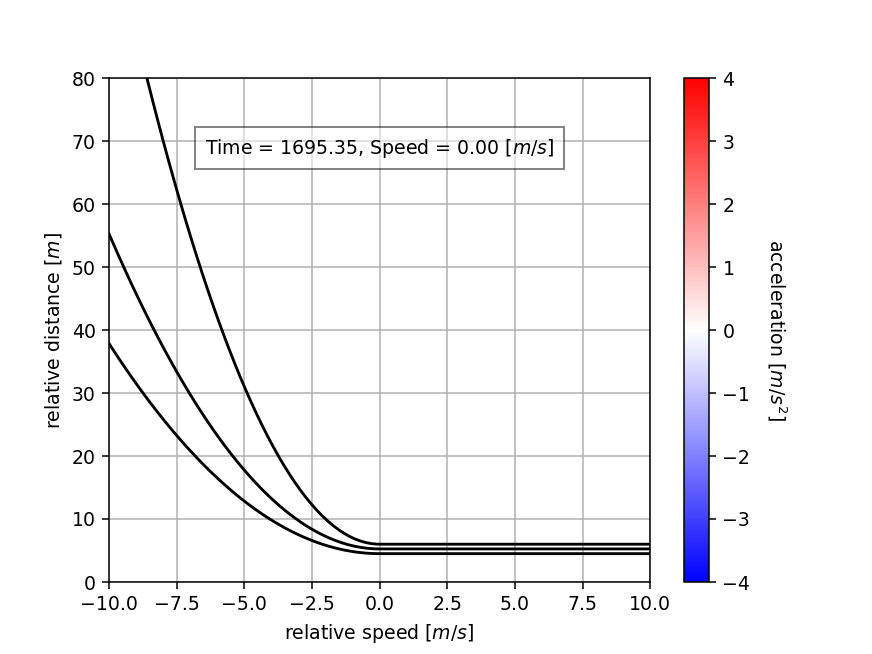

In [10]:
## init figure
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('bwr')   #RdYlBu
sc = plt.scatter([],[],c=[],vmin=-4.0, vmax=4.0, s=35, cmap=cm)
cbar = plt.colorbar(sc)
cbar.set_label('acceleration $[m/s^{2}]$', labelpad=20, rotation=270)

ani = FuncAnimation(fig, update, frames=None)
plt.show()